In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cft
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib import rc
rc('animation', html='html5')

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

import netCDF4 as nc
import datetime, time, os, sys
from glob import glob
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib.collections import LineCollection

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [2]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:33593 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 16 Memory: 68.72 GB


In [3]:
db = '/scratch/x77/db6174/access-om2/archive/databases/cc_database_nostress_cont_param_kpp.db'
session = cc.database.create_session(db)

In [4]:
expt = ['025deg_jra55_ryf_nostress_cont_kpp','025deg_jra55_ryf_nostress_cont_param_kpp']

In [5]:
#dir_list = ['/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont_kpp',
#            '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont_param_kpp']
#cc.database.build_index(dir_list, session, update=True)

In [5]:
hblt_orig = cc.querying.getvar(expt = expt[0], session = session, variable = 'hblt', frequency = '1 daily', ncfile = 'ocean-2d-hblt-1-daily-snap-ym_1900_01.nc')
hblt_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'hblt', frequency = '1 daily', ncfile = 'ocean-2d-hblt-1-daily-snap-ym_1900_01.nc')

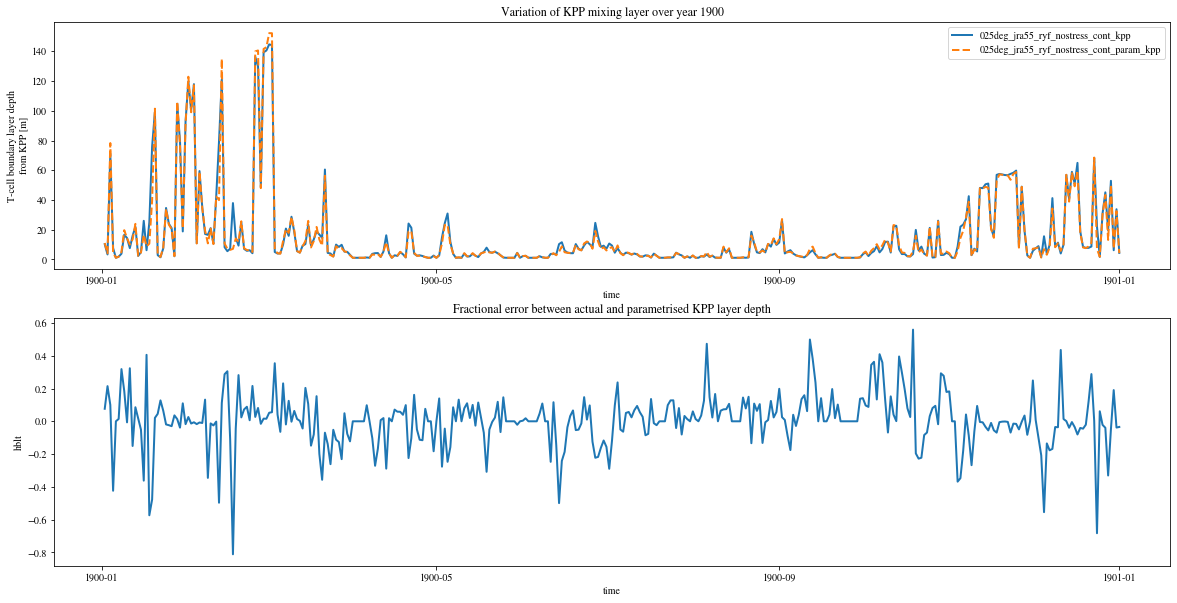

In [6]:
x_val = -160
y_val = 30

plt.figure(figsize=(20,10))

plt.subplot(211)
hblt_orig.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').plot(label = expt[0])
hblt_pram.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').plot(ls = '--',label = expt[1])
plt.title('Variation of KPP mixing layer over year 1900')
plt.legend()

plt.subplot(212)
((hblt_pram - hblt_orig)/hblt_orig).sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').plot()
plt.title('Fractional error between actual and parametrised KPP layer depth')
plt.show()

In [7]:
dVsq_orig = cc.querying.getvar(expt = expt[0], session = session, variable = 'dVsq', frequency = '1 daily')
dVsq_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'dVsq', frequency = '1 daily')

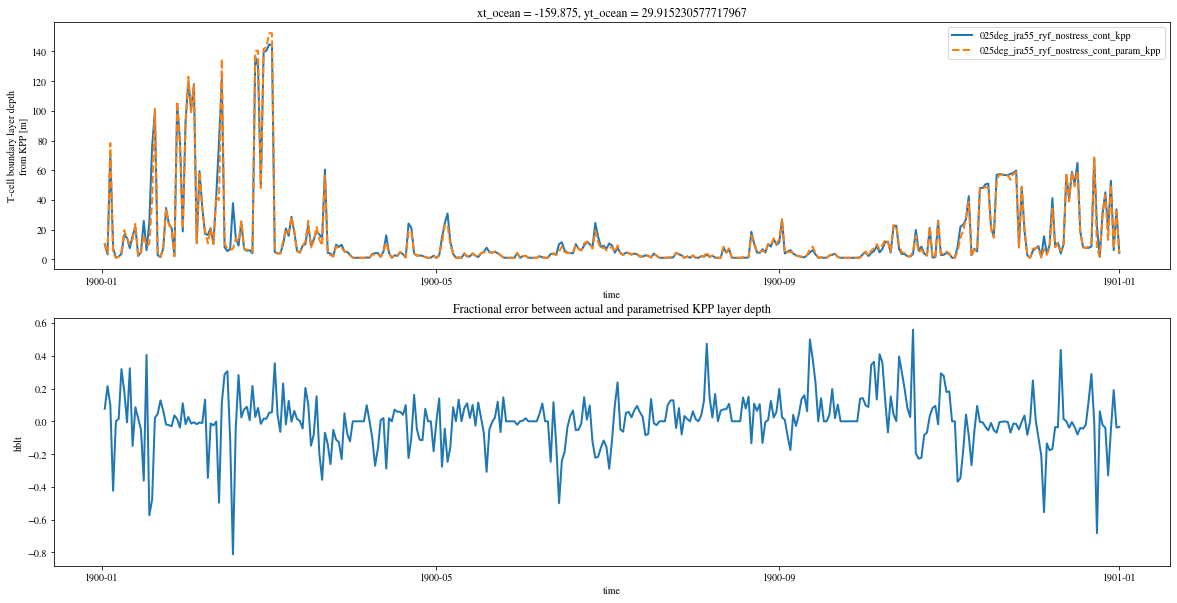

In [18]:
x_val = -160
y_val = 30

plt.figure(figsize=(20,10))

plt.subplot(211)
hblt_orig.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').plot(label = expt[0])
hblt_pram.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').plot(label = expt[1],ls = '--')
plt.legend()

plt.subplot(212)
((hblt_pram - hblt_orig)/hblt_orig).sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').plot()
plt.title('Fractional error between actual and parametrised KPP layer depth')
plt.show()

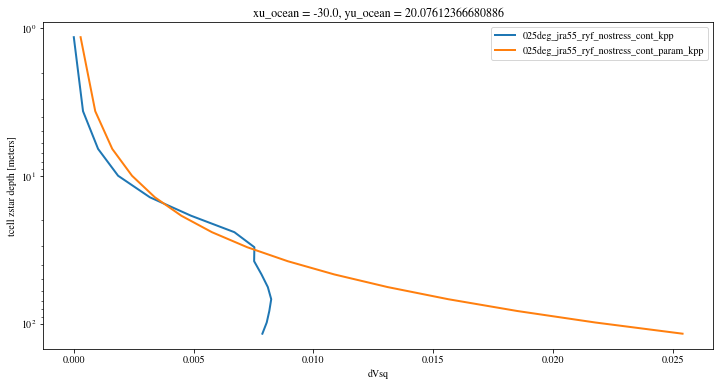

In [9]:
x_val = -30
y_val = 20

plt.figure(figsize=(12,6))
plt.yscale('log')
plt.gca().invert_yaxis()
hblt_val = hblt_orig.sel(xt_ocean = x_val, method = 'nearest').sel(yt_ocean = y_val, method = 'nearest').sel(
    time = slice('1900-03-01','1900-03-02')).mean('time').values
dVsq_orig.sel(xu_ocean = x_val, method = 'nearest').sel(yu_ocean = y_val, method = 'nearest').sel(st_ocean = slice(0,hblt_val + 20)).sel(
    time = slice('1900-03-01','1905-03-02')).mean('time').plot(label = expt[0],y = 'st_ocean')
dVsq_pram.sel(xu_ocean = x_val, method = 'nearest').sel(yu_ocean = y_val, method = 'nearest').sel(st_ocean = slice(0,hblt_val + 20)).sel(
    time = slice('1900-03-01','1905-03-02')).mean('time').plot(label = expt[1],y = 'st_ocean')
plt.legend()

## Animations

In [10]:
import datetime, time, os, sys
import netCDF4 as nc

dir = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont_param_kpp/output000/ocean'
file = os.path.join(dir,'ocean-2d-hblt-1-daily-snap-ym_1900_01.nc')

In [11]:
data = xr.open_dataset(file)
filename = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont_param_kpp/output000/ocean/ocean-2d-hblt-1-daily-snap-ym_1900_01.nc'
particles = nc.Dataset(filename)
y = particles.variables['yt_ocean'][:]
x = particles.variables['xt_ocean'][:]
time1 = particles.variables['time'][:]

In [12]:
X,Y = np.meshgrid(x,y)

In [13]:
iter1 = 'ocean-2d-hblt-1-daily-snap-ym_1900_01.nc'
dir1 = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont_param_kpp/output000/ocean'
dir2 = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont_kpp/output000/ocean'

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


tornado.application - ERROR - Uncaught exception GET /status/ws (::1)
HTTPServerRequest(protocol='http', host='localhost:8889', method='GET', uri='/status/ws', version='HTTP/1.1', remote_ip='::1')
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/tornado/websocket.py", line 954, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/tornado/web.py", line 3173, in wrapper
    return method(self, *args, **kwargs)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/bokeh/server/views/ws.py", line 137, in open
    raise ProtocolError("Token is expired.")
bokeh.protocol.exceptions.ProtocolError: Token is expired.


120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361


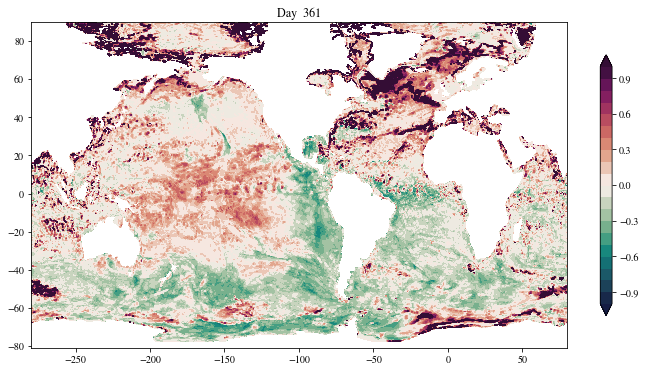

In [19]:
nframes = 362
startframe = 1
nt = 0

fig = plt.figure(figsize=(12,6))
rho = 1025

def updatefig(nt):
    plt.clf()
    currentframe = startframe + nt
    year = 1900
    day = nt
    
    iter1 = 'ocean-2d-hblt-1-daily-snap-ym_1900_01.nc'
    dir1 = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont_param_kpp/output000/ocean'
    dir2 = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont_kpp/output000/ocean'

    file1 = os.path.join(dir1,iter1)
    file2 = os.path.join(dir2,iter1)
    
    data1 = xr.open_dataset(file1)
    data2 = xr.open_dataset(file2)
    
    hblt_pram_day = data1.hblt.sel(time = slice(hblt_pram.time[nt].values,hblt_pram.time[nt+1].values)).mean('time')
    hblt_cont_day = data2.hblt.sel(time = slice(hblt_pram.time[nt].values,hblt_pram.time[nt+1].values)).mean('time')
    
    plt.title('Day %4d' % day)
    p1 = plt.contourf(X,Y,(hblt_pram_day - hblt_cont_day)/(hblt_cont_day),cmap=cm.cm.curl, levels=np.linspace(-1,1,21), extend='both')
    p1 = plt.colorbar(p1,orientation = 'vertical', shrink = 0.8)
    
    filestr = '/home/156/db6174/x77/Ryan_No_Stress_Runs/Figures/hblt/image%04d.png' % nt
    plt.savefig(filestr,dpi = 900)
    print(nt)        
    return p1
    
anim = animation.FuncAnimation(fig, updatefig, frames=nframes, interval = 1, blit=False)
metadata = dict(title='MOC_Yearly', artist='GFD ANU',comment='Animation made using matplotlib and ffmpeg')
ffwriter = animation.FFMpegWriter(fps=8, codec='libx264', bitrate=4000, extra_args=['-pix_fmt','yuv420p'], metadata=metadata)
anim.save('hblt_diff.m4v', writer=ffwriter)

plt.show()

## Correlation

In [30]:
corr_array = np.zeros((1080,1440))

t_start = '1900-01-01'
t_end = '1900-12-30'
corr_array[:,:] = xr.corr(hblt_orig,hblt_pram, dim = "time").values

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

In [31]:
corr_param = xr.DataArray(corr_array, coords = [hblt_orig.yt_ocean, hblt_orig.xt_ocean],  
                              dims = ['yt_ocean', 'xt_ocean'], name = 'Correlation coefficient', attrs = {'units':'none'})

distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


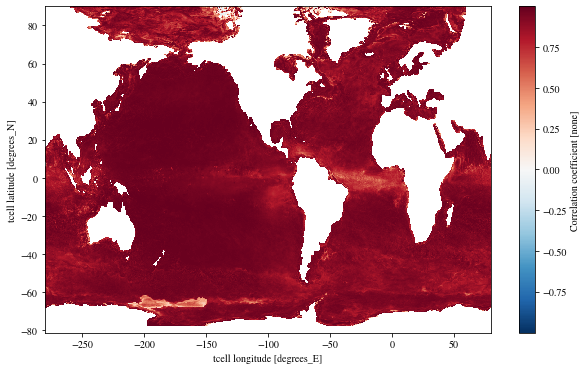

In [32]:
plt.figure(figsize = (10,6))
corr_param.plot()